In [690]:
import numpy as np
from scipy.integrate import *
from numpy.fft import *
import matplotlib.pyplot as plt

In [691]:
def diffeq(X,t):
  """
  A modell: R sugarú körön egyenletesen elrendezett golyók összekötve valamilyen rugóval.
  Bemenetnek kapja egy array-ben:
  - kezdeti szögeket (belső és külső)
  - kezdeti szögsebességeket
  """

  N=int((len(X)-2)/2)
  d=1 #"rugóállandó"
  m=1 #tömegek
  R=1 #"kör" sugara
  l=0.01 #rugók nyugalmi hossza
  rho=1.1 #külső kör sugara
  k=0.5 #külső kölcsönhatás

  phi = np.array(X[:N]) #első N darab elem a szögek
  omega = np.array(X[N:2*N])  #második N darab a szögsebességek
  theta = np.array([X[-2]]) #utolsó előtti elem a kezdeti szög
  Omega = np.array([X[-1]]) #utolsó a szögsebessége

  phi_m1 = np.roll(phi,-1)
  phi_p1 = np.roll(phi,1)

  beta = (1/(m*R)) * (-1) * d * ( R * np.sin(phi-phi_m1) -
                                  R * np.sin(phi_p1-phi) -
                                  l * np.cos((phi+phi_m1)/2) +
                                  l * np.cos((phi_p1+phi)/2) +
                                  (1/d) * rho * k * np.exp( -np.sqrt(R**2 - 2*R*rho*np.cos(theta - phi) + rho**2))*np.sin(theta - phi)
                                  / np.sqrt(R**2 - 2*R*rho*np.cos(theta - phi) + rho**2 )
                                  )

  Beta = np.array([(1/(m*R)) * R * k * np.sum(np.exp( -np.sqrt(R**2 - 2*R*rho*np.cos(theta - phi) + rho**2))*np.sin(theta - phi)
                                  / np.sqrt(R**2 - 2*R*rho*np.cos(theta - phi) + rho**2 ))])

  U = np.concatenate((omega, beta, Omega, Beta))

  return U

In [692]:
n=100 #golyók száma
s=200 #időfelosztás
T=200 #vizsgált időintervallum

In [693]:
t=np.linspace(0,T,s)

In [694]:
phi_0=np.linspace(0,2*np.pi,n)

omega_0=np.zeros(n)
omega_0[0]=0.5

theta=np.array([0])
Omega=np.array([2.8])

X_0=np.concatenate((phi_0,omega_0,theta, Omega))

In [695]:
u=odeint(diffeq,X_0,t)
#diffegy megoldása

In [696]:
phi=u[:,:n]
omega=u[:,n:2*n]
theta=u[:,-2]
Omega=u[:,-1]
#A megoldás szétbontva

Text(0.5, 1.0, 'A szögsebességek alakulása')

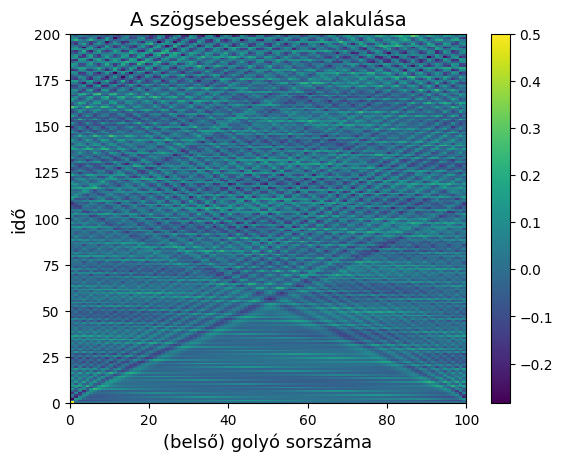

In [697]:
plt.pcolormesh(omega)
plt.colorbar()
plt.ylabel('idő', size=13)
plt.xlabel('(belső) golyó sorszáma', size=13)
plt.title('A szögsebességek alakulása', size=14)

Text(0.5, 1.0, 'A külső golyó körfrekvenciájának alakulása')

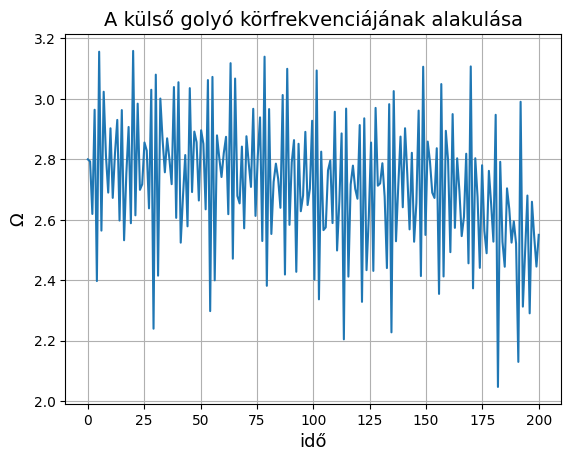

In [718]:
plt.plot(t,Omega)
plt.grid()
plt.ylabel(r'$\Omega$ ', size=13)
plt.xlabel('idő', size=13)
plt.title('A külső golyó körfrekvenciájának alakulása', size=14)

In [699]:
r=1
v=r*omega

In [700]:
v_fft=np.abs(fft(ifft(v, axis=0),axis=1))
w=(fftfreq(len(t),t[1]-t[0]))
k=fftfreq(v.shape[1],1)

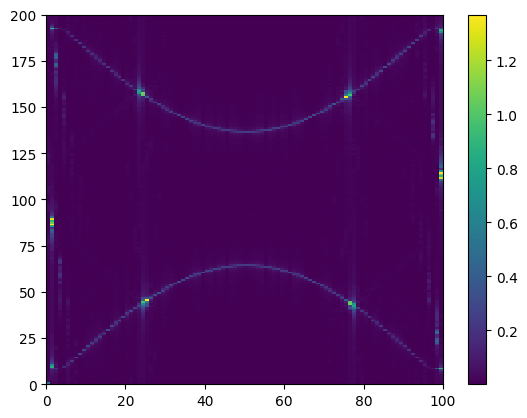

In [709]:
plt.pcolormesh(v_fft)
plt.colorbar()

/tmp/ipython-input-1771626772.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(k,np.abs(w),v_fft)


Text(0.5, 1.0, '$\\omega (k)$')

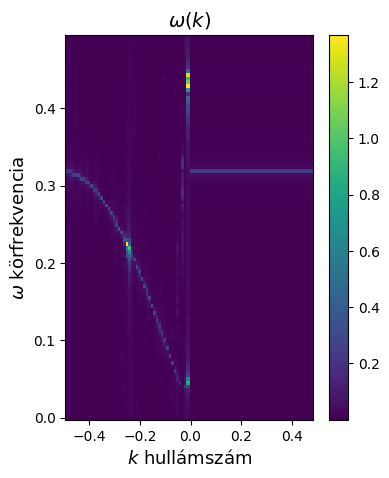

In [710]:
fig, axs = plt.subplots(figsize=(4, 5))
plt.pcolor(k,np.abs(w),v_fft)
plt.colorbar()
plt.ylabel(r'$\omega$ körfrekvencia', size=13)
plt.xlabel(r'$k$ hullámszám', size=13)
plt.title(r'$\omega (k)$', size=14)